In [9]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from skimage import exposure
import os

In [10]:
settings = pd.read_csv('../data/plate_pics/settings.tsv', sep='\t')
levels_dict = dict(zip(settings['prefix'], settings[['levels_l', 'levels_r']].apply(tuple, axis=1)))
lanes_dict = dict(zip(settings['prefix'], settings[['row_1', 'row_12']].apply(tuple, axis=1)))

In [11]:
def adjust(prefix):
    file = f'../data/plate_pics/{prefix}.png'
    
    img = cv2.imread(file)
    
    levels = levels_dict[prefix]
    
    img_adj = exposure.rescale_intensity(img, in_range=(levels[0], levels[1]))
    img_adj = img_adj + 50
    
    #plt.imshow(img_adj)
    
    return img_adj

In [12]:
def get_lanes(img, x_start, y_min=None, y_max=None, save=False):
    
    img_copy = img.copy()
    
    n_lanes = 12
    
    # get dimensions
    if not y_max:
        y_max = img.shape[1]
        
    if not y_min:
        y_min = 0
    
    #lane_width = round((x_end - x_start)/(n_lanes - 1))
    lane_width = 104
    #half_lane_width = round(lane_width/2)
    half_lane_width = 52
    
    crop_coords = []
    
    for lane in range(n_lanes):
        # get x coord of center line
        x = round(x_start + lane_width * (lane))
        
        # line
        centerline_start = (x, y_min)
        centerline_end = (x, y_max)
        
        centerline_color = (255, 0, 0)
        
        cv2.line(img,
                 centerline_start,
                 centerline_end,
                 centerline_color, 4)

        # rectangle
        rec_start = (x - half_lane_width, y_min)
        rec_end = (x + half_lane_width, y_max)
        
        crop_coords.append([rec_start, rec_end])
        
        rec_color = (0, 255, 0)
        
        cv2.rectangle(img,
                      rec_start,
                      rec_end,
                      rec_color, 4)
    
    if save:
        lane_labels = ['prd1', 'jet', 'ver', 'for', 'cer', 'ros', 'pin', 'amb', 'cha', 'can', 'jun', 'pis']
        lane_labels.reverse()
        
        for i, coord_pair in enumerate(crop_coords):
            
            
            start_col = coord_pair[0][0]
            end_col = coord_pair[1][0]
            
            crop = img_copy[y_min:y_max,
                            start_col:end_col]
            
            name = f'{lane_labels[i]}-{save}.png'
            path = os.path.join('../data/plate_pics/lanes/', name)
            
            cv2.imwrite(path, crop)
        
        
    plt.imshow(img)

In [13]:
def main(prefix):
    img = adjust(prefix)
    
    get_lanes(img, lanes_dict[prefix][0], y_min=110, y_max=550, save=prefix)
    #get_lanes(img, lanes_dict[prefix][0], y_max=550, save=prefix)

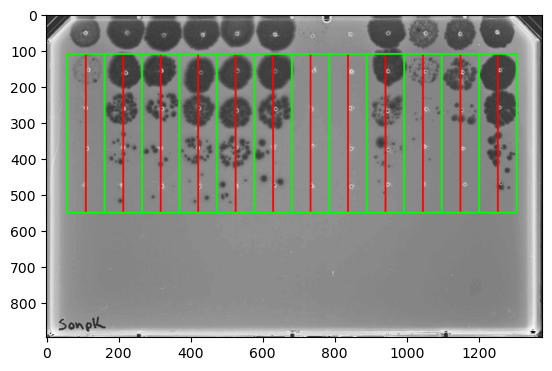

In [14]:
for prefix in settings['prefix']:
    main(prefix)

In [15]:
strain_order = ['senpk',
 'ecopk',
 'cwkpk',
 'eclpk',
 'kpnpk',
 'cfrpk',
 'smapk',
 'etapk',
 'patpk',
 'pmipk',
 'sonpk',
 'pflpk',
 'ppupk']

In [16]:
def plot(phage):
    dire = '../data/plate_pics/lanes'

    fig, axs = plt.subplots(1, 13, figsize=(10,15), sharey=True, sharex=True)
    
    i = 0
    
    for prefix in strain_order:
        path = os.path.join(dire, f'{phage}-{prefix}.png')
        title = prefix
        img = plt.imread(path)
        axs[i].imshow(img)
        axs[i].set_title(title)
        axs[i].axis('off')
        i += 1
    
    plt.savefig(f'../data/passays/{phage}.svg')

In [17]:
phages_order = ['prd1', 'jet', 'ver', 'for', 'cer', 'ros', 'pin', 'amb', 'cha', 'can', 'jun', 'pis']

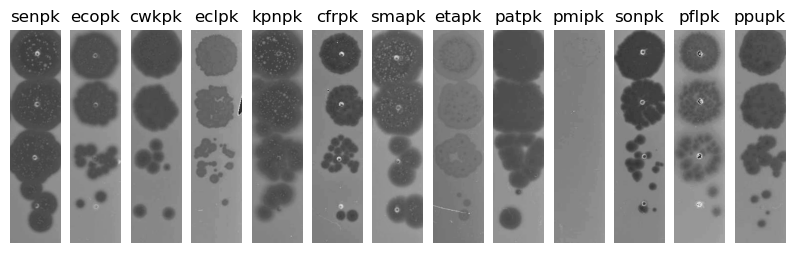

In [18]:
plot('prd1')

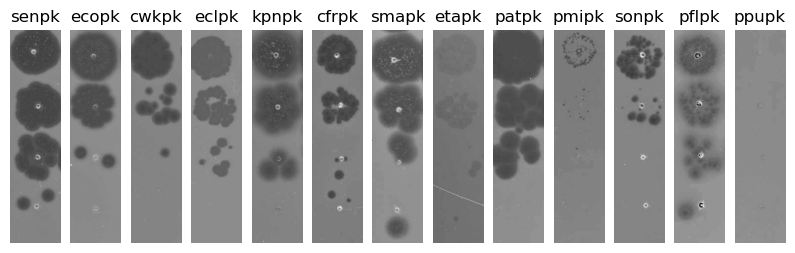

In [19]:
plot('jet')

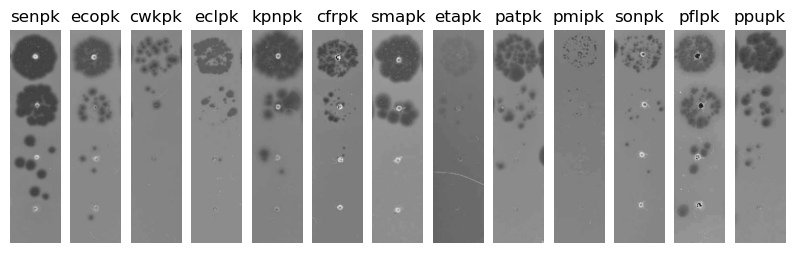

In [20]:
plot('ver')

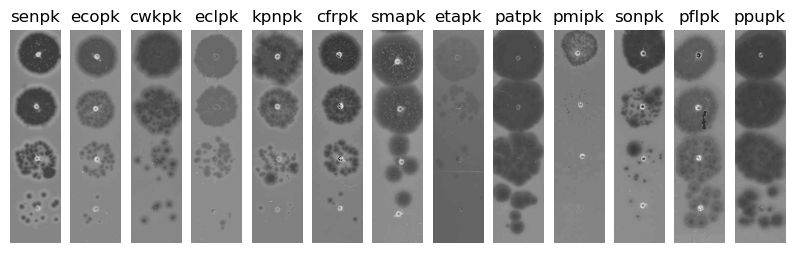

In [21]:
plot('for')

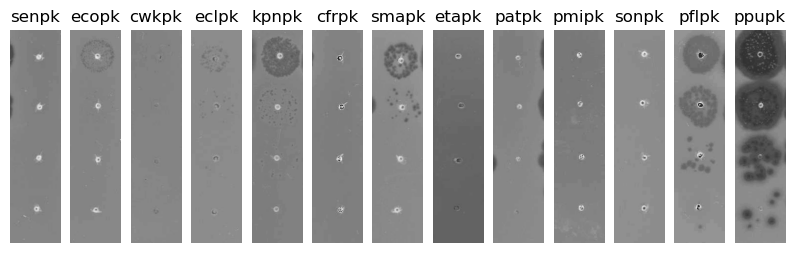

In [22]:
plot('cer')

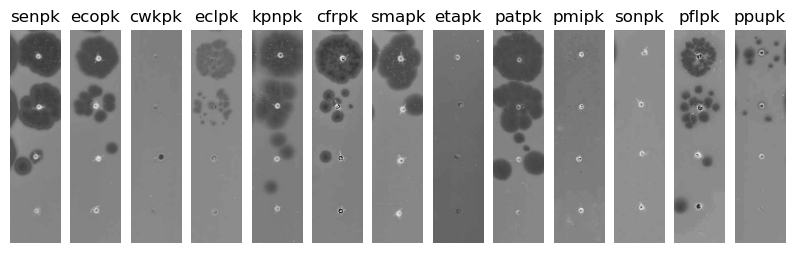

In [23]:
plot('ros')

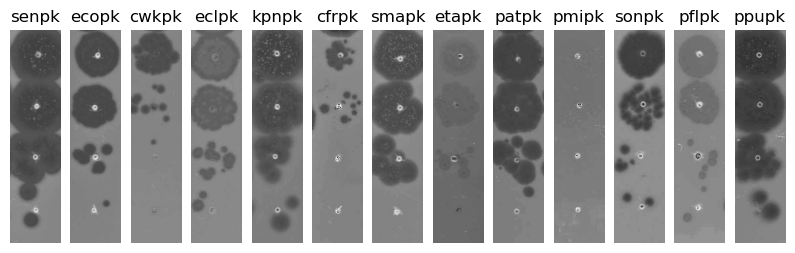

In [24]:
plot('pin')

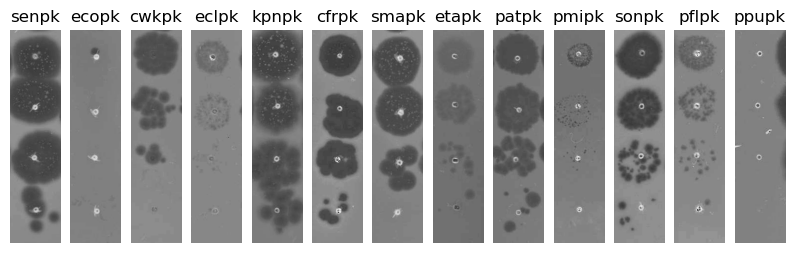

In [25]:
plot('amb')

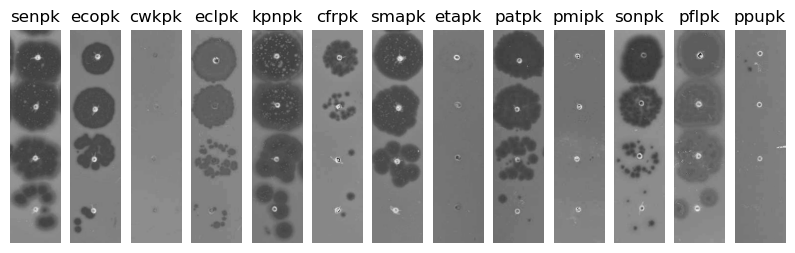

In [26]:
plot('cha')

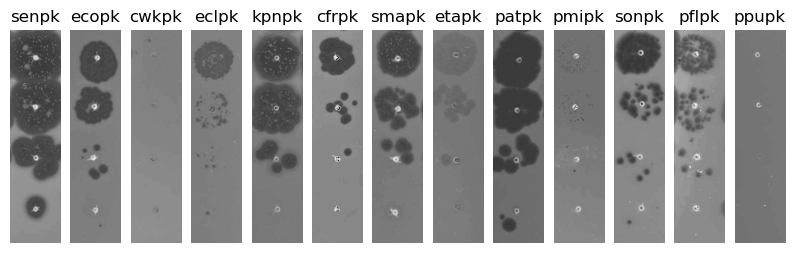

In [27]:
plot('can')

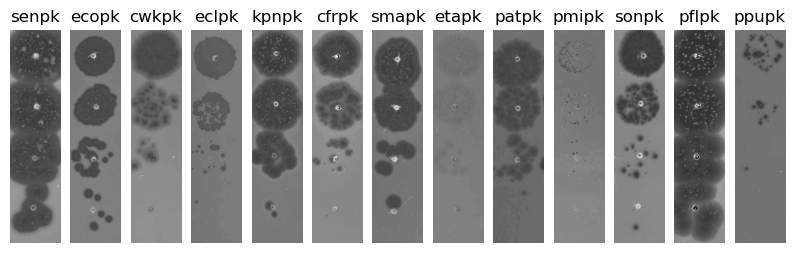

In [28]:
plot('jun')

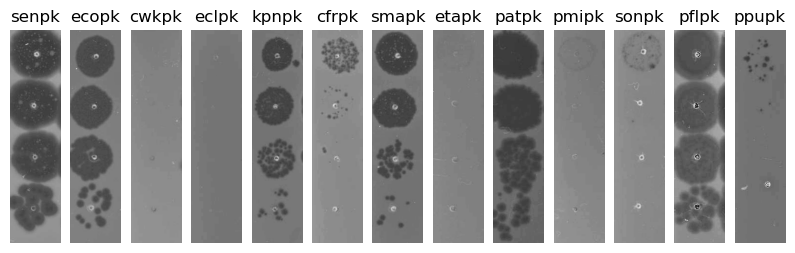

In [29]:
plot('pis')